**Exploratory Data Analysis (EDA)**

Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load data

In [3]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

print("Customers Data:\n", customers.head())
print("\nProducts Data:\n", products.head())
print("\nTransactions Data:\n", transactions.head())

Customers Data:
   CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Data:
   ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Data:
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C01

Data Types, Missing Values and Summary Statistics

In [14]:
print("Customers Info:\n")
print( customers.info())

print("\nProducts Info:\n")
print( products.info())

print("\nTransactions Info:\n")
print(transactions.info())

Customers Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Products Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None

Transactions Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-N

In [18]:

print("Customers Stats:\n",customers.describe())

print("\nProducts Stats:\n",products.describe())

print("\nTransactions Stats:\n",transactions.describe())

Customers Stats:
        CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3

Products Stats:
             Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000

Transactions Stats:
           Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


Data Cleaning

In [25]:
print("Missing values in Customers Data:\n", customers.isnull().sum())
print("Missing values in Products Data:\n", products.isnull().sum())
print("Missing values in Transactions Data:\n", transactions.isnull().sum())

# Converting to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# print(customers.dtypes)
# print(transactions.dtypes)

# Remove duplicates if any
customers.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)
transactions.drop_duplicates(inplace=True)

Missing values in Customers Data:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Missing values in Products Data:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Missing values in Transactions Data:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


Data Visualization

1. No. of customers by region

C:\Users\DELL\AppData\Local\Temp\ipykernel_14828\918744887.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Region', data = customers, palette='viridis')


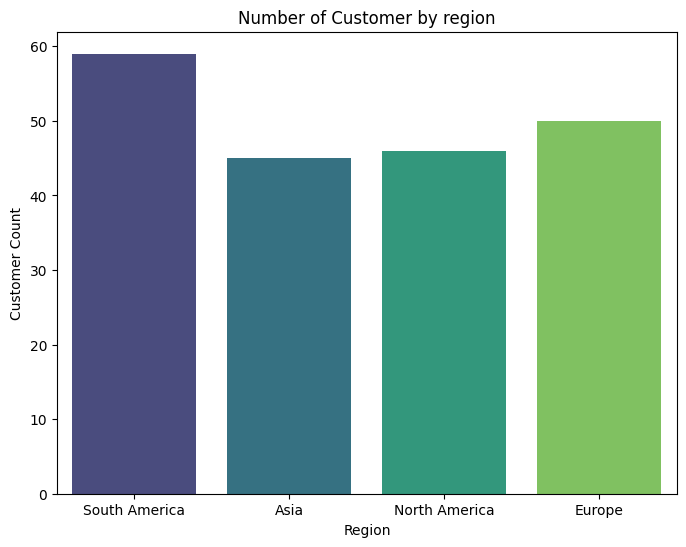

In [26]:
plt.figure(figsize=(8,6))
sns.countplot(x = 'Region', data = customers, palette='viridis')
plt.title("Number of Customer by region")
plt.xlabel('Region')
plt.ylabel('Customer Count')
plt.show()

2. Popular Product Categories

C:\Users\DELL\AppData\Local\Temp\ipykernel_14828\3139120574.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y = 'Category', data = products, order=products['Category'].value_counts().index, palette='viridis')


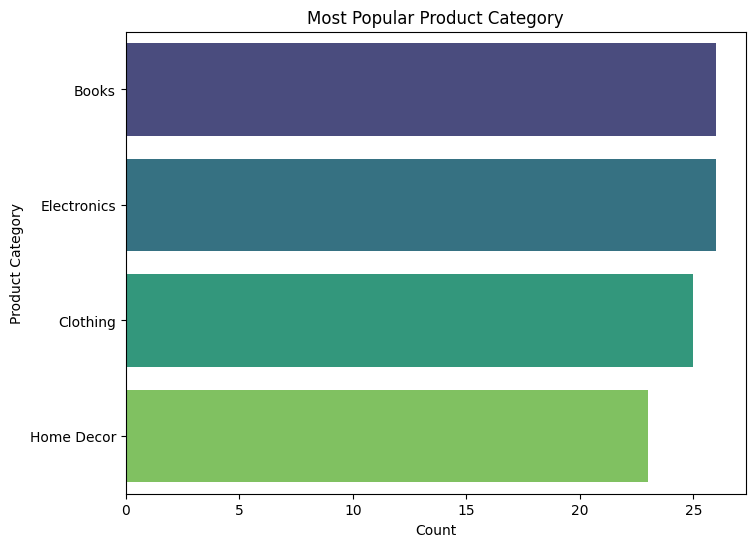

In [30]:
plt.figure(figsize=(8,6))
sns.countplot(y = 'Category', data = products, order=products['Category'].value_counts().index, palette='viridis')
plt.title("Most Popular Product Category")
plt.xlabel('Count')
plt.ylabel('Product Category')
plt.show()

3. Products with the highest number of sales.

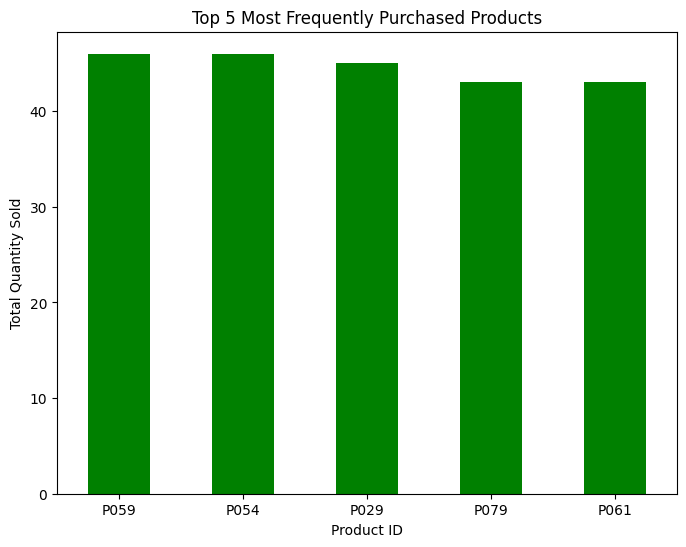

In [34]:
popular_products = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(8, 6))
popular_products.plot(kind='bar', color='green')
plt.title('Top 5 Most Frequently Purchased Products')
plt.xlabel('Product ID')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=0)
plt.show()


ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
Name: Quantity, dtype: int64


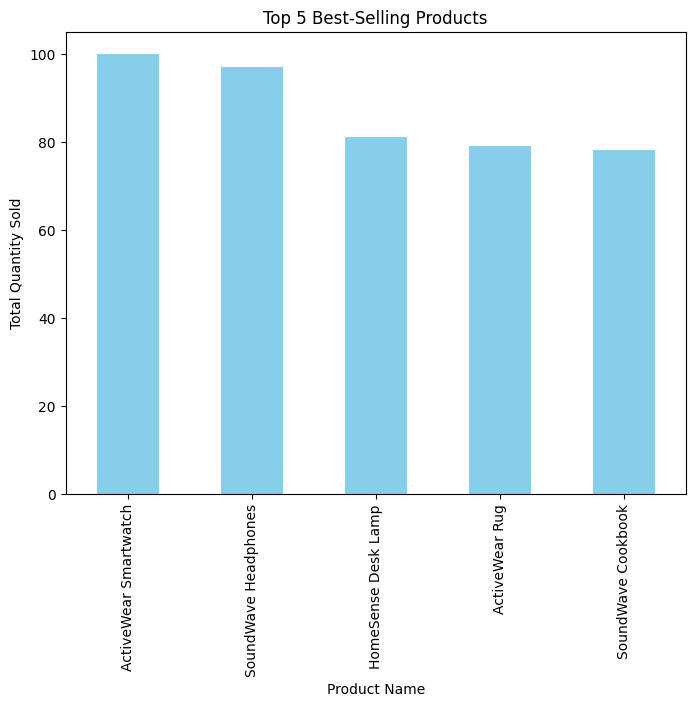

In [36]:
# Merge transactions with products on ProductID
merged_df = transactions.merge(products, on='ProductID')

# Grouping by ProductName and sum the Quantity sold
product_sales = merged_df.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False)

# top 5 products 
print(product_sales.head())

top_products = product_sales.head(5)

plt.figure(figsize=(8, 6))
top_products.plot(kind='bar', color='skyblue')
plt.title('Top 5 Best-Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.show()

4. Top Revenue generating Products

ProductName
ActiveWear Smartwatch      39096.97
SoundWave Headphones       25211.64
SoundWave Novel            24507.90
ActiveWear Jacket          22712.56
ActiveWear Rug             22314.43
TechPro Headphones         19513.80
BookWorld Cookbook         19221.99
BookWorld Sweater          18743.79
TechPro Textbook           18267.96
ActiveWear Cookware Set    18083.73
Name: TotalValue, dtype: float64


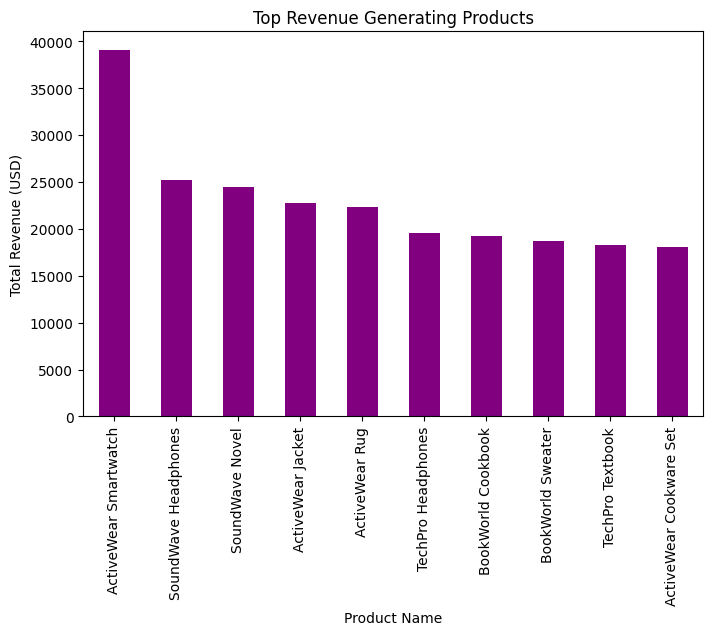

In [41]:
top_products = merged_df.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False)
# top 10 products 
print(top_products.head(10))

top_10_products = top_products.head(10)

plt.figure(figsize=(8, 5))
top_10_products.plot(kind='bar', color='purple')
plt.title('Top Revenue Generating Products')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue (USD)')
plt.show()




5. How much customers usually spend per transaction.

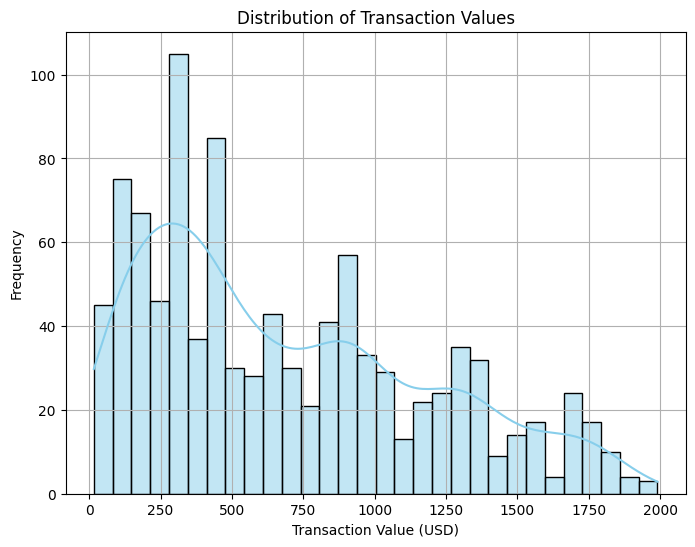

In [42]:
plt.figure(figsize=(8, 6))
sns.histplot(transactions['TotalValue'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Transaction Values')
plt.xlabel('Transaction Value (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
